In [3]:
from google.colab import files
uploaded=files.upload()

Saving multiTimeline.csv to multiTimeline.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
plt.rcParams.update({'figure.figsize': (12, 6), 'figure.dpi': 120})
df=pd.read_csv(io.BytesIO(uploaded["multiTimeline.csv"]),index_col='Month',parse_dates=True)
df.head()

,NBA,Premier League,LaLiga,NFL
Month,,,,
2004-01-01,20,6,2,25
2004-02-01,23,6,2,16
2004-03-01,19,6,3,11
2004-04-01,23,6,2,15
2004-05-01,26,5,2,7


In [ ]:
print(df.describe())
df_copy=df

              NBA  Premier League      LaLiga         NFL
count  208.000000      208.000000  208.000000  208.000000
mean    29.942308       18.884615    9.557692   28.274038
std     17.071222       16.023417    8.678728   21.737052
min      7.000000        3.000000    1.000000    6.000000
25%     17.000000        7.000000    3.000000   10.750000
50%     27.000000       14.000000    6.000000   18.000000
75%     38.000000       26.000000   15.000000   43.000000
max     86.000000       85.000000   37.000000   87.000000


In [5]:
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Visualize the data 

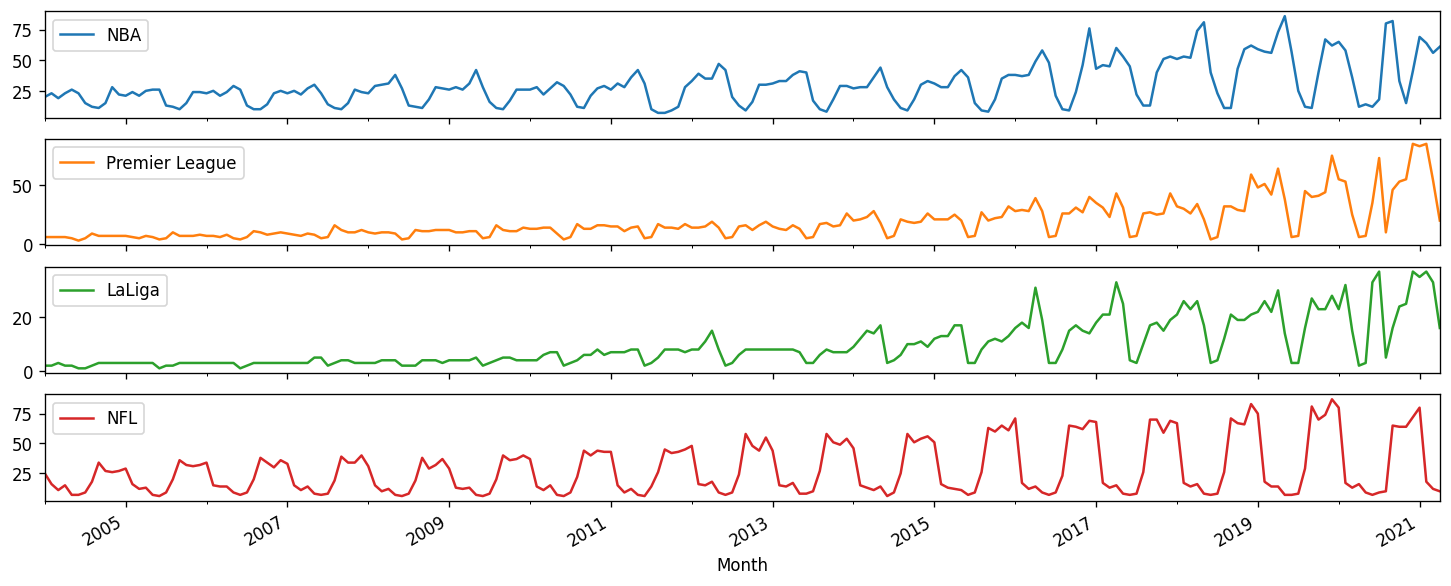

In [ ]:

df.plot(subplots=True, figsize=(15,6))
plt.show()

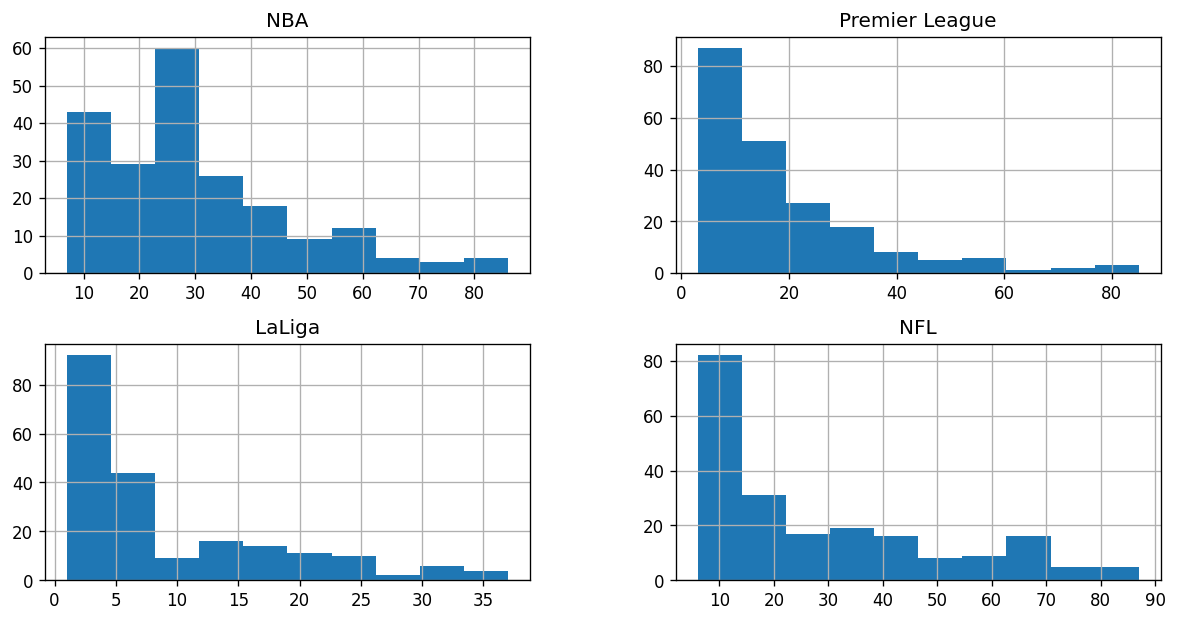

In [ ]:
# plotting the original data
df.hist( )
plt.show()

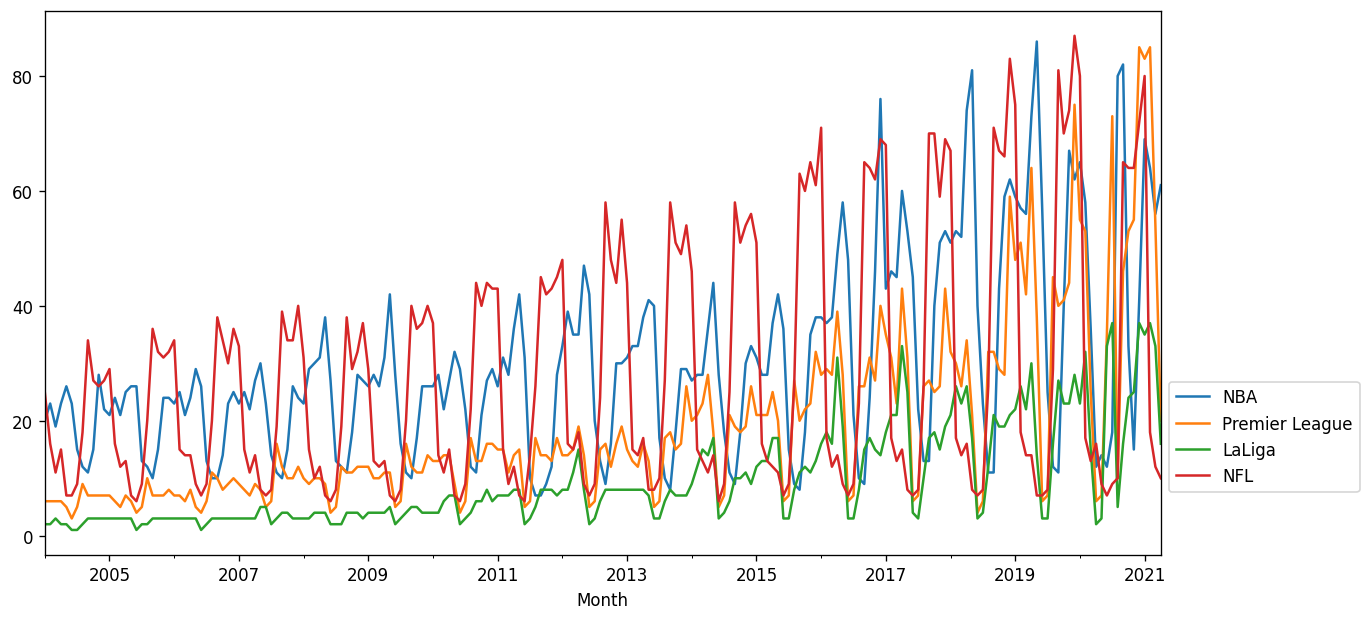

In [ ]:
ax=df.plot()
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3,bbox_to_anchor=(1.0,0.1))

In [ ]:
!pip install calplot

(<Figure size 1200x3672 with 18 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1b580b150>,
       dtype=object))

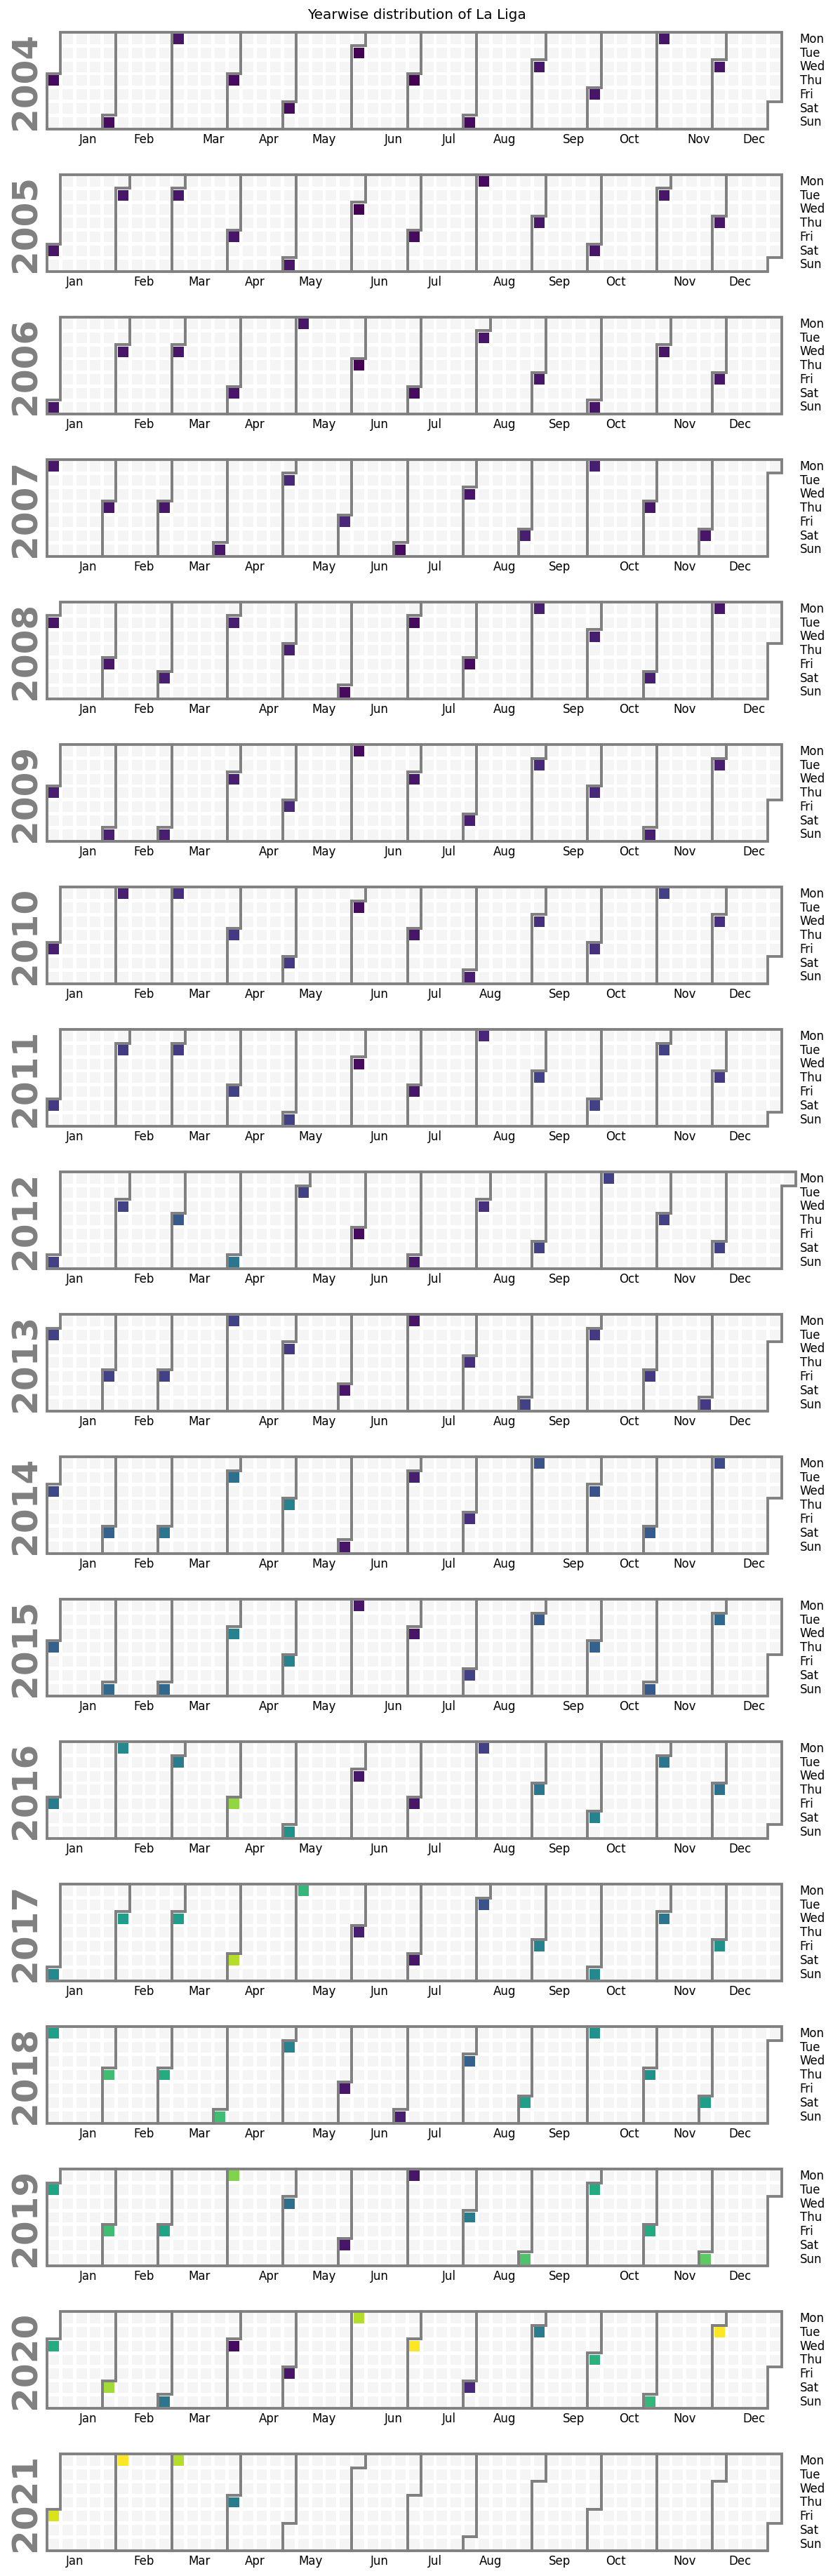

In [ ]:
import calplot
calplot.calplot(df['LaLiga'],linewidth = 2.3,colorbar=False,suptitle='Yearwise distribution of La Liga')

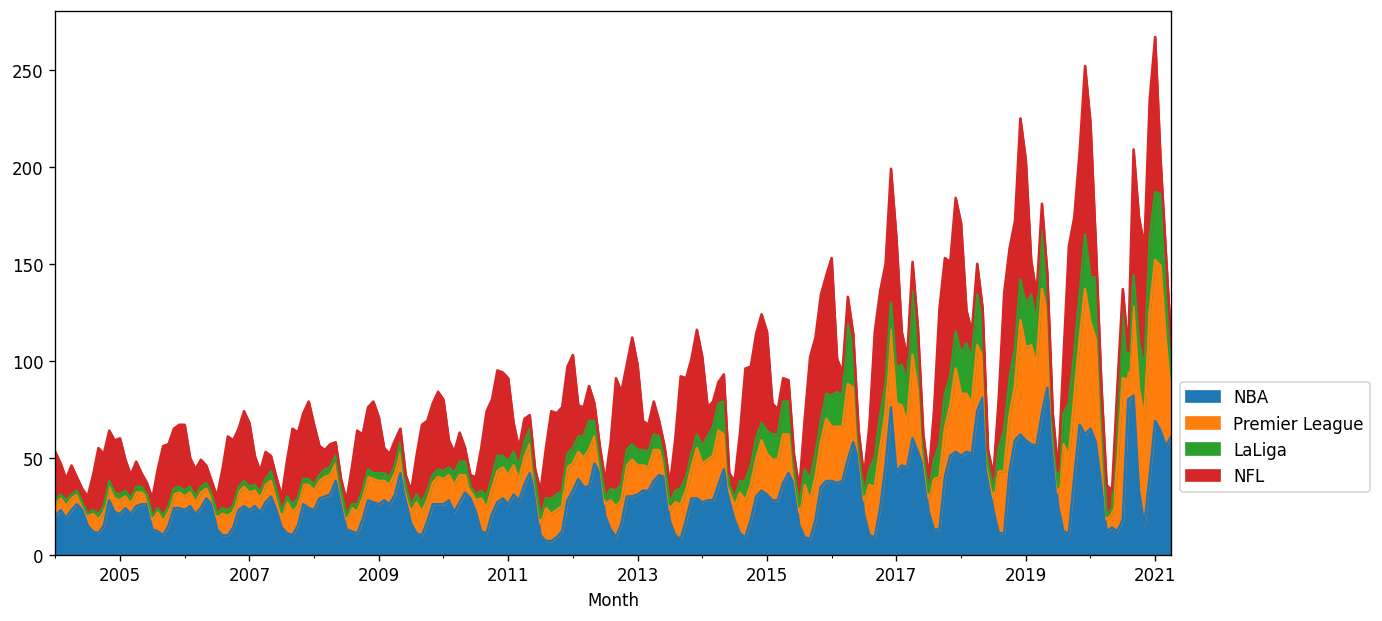

In [ ]:

ax=df.plot.area()
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3,bbox_to_anchor=(1.0,0.1))

# TRAIN and TEST

In [6]:

##Splitting tr=into train and test 
train= df[0:150]
test=df[150:]
print(train)

            NBA  Premier League  LaLiga  NFL
Month                                       
2004-01-01   20               6       2   25
2004-02-01   23               6       2   16
2004-03-01   19               6       3   11
2004-04-01   23               6       2   15
2004-05-01   26               5       2    7
...         ...             ...     ...  ...
2016-02-01   37              29      18   17
2016-03-01   38              28      16   12
2016-04-01   49              39      31   14
2016-05-01   58              28      19    9
2016-06-01   48               6       3    7

[150 rows x 4 columns]


In [ ]:
print(test)

            NBA  Premier League  LaLiga  NFL
Month                                       
2016-07-01   21               7       3    9
2016-08-01   10              26       8   23
2016-09-01    9              26      15   65
2016-10-01   24              31      17   64
2016-11-01   46              27      15   62
2016-12-01   76              40      14   69
2017-01-01   43              35      18   68
2017-02-01   46              31      21   17
2017-03-01   45              23      21   13
2017-04-01   60              43      33   15
2017-05-01   53              31      25    8
2017-06-01   45               6       4    7
2017-07-01   22               7       3    8
2017-08-01   13              26      10   26
2017-09-01   13              27      17   70
2017-10-01   40              25      18   70
2017-11-01   51              26      15   59
2017-12-01   53              43      19   69
2018-01-01   51              32      21   67
2018-02-01   53              30      26   17
2018-03-01

# NBA

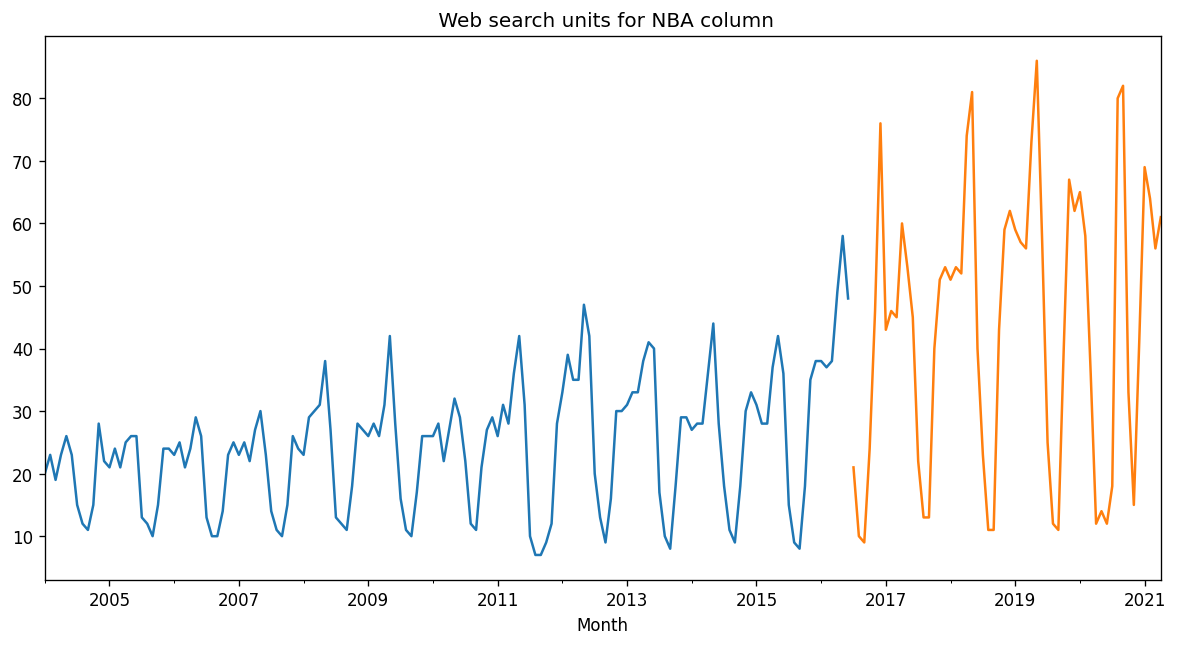

In [ ]:
train.NBA.plot(title=" Web Search units for NBA column")
test.NBA.plot(title=" Web search units for NBA column")
plt.show()

### Naive Forecast

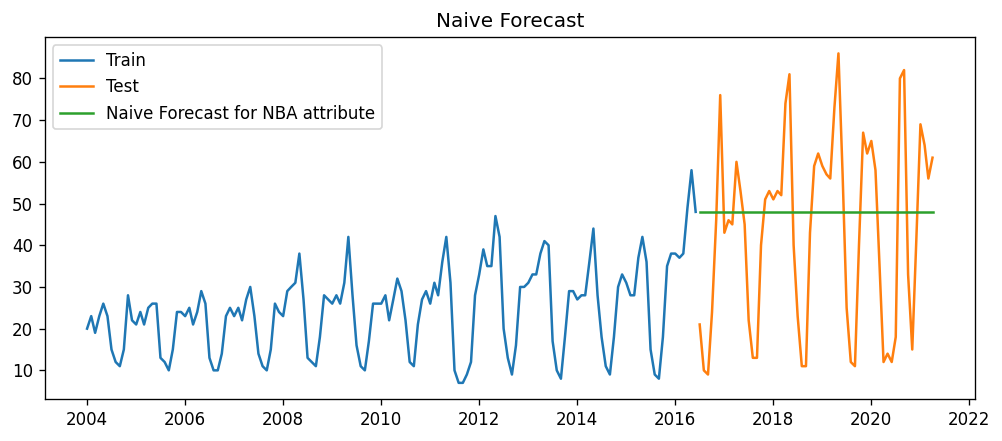

In [ ]:
dd =np.asarray(train.NBA)
y_hat = test.copy()
y_hat['naive']= dd[len(dd)-1]
plt.figure(figsize=(10,4))
plt.plot(train.index,train['NBA'],label='Train')
plt.plot(test.index,test['NBA'],label='Test')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast for NBA attribute')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

We can infer from the graph that the web search count for NBA league is not stable from say March,2016. Many a times we are provided with a dataset, which is stable throughout it’s time period. If we want to forecast the price for the next day, we can simply take the last day value and estimate the same value for the next day. Such forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method.The graph clearly shows that it's not stable for the upcoming days .Hence, the naive method should not be used. 



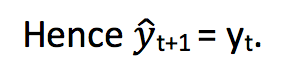

In [ ]:
## Printing RMSE for naive forecast 
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_naive = sqrt(mean_squared_error(test.NBA, y_hat.naive))
print(rms_naive)

22.73042924788495


### Simple Average 
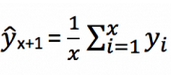

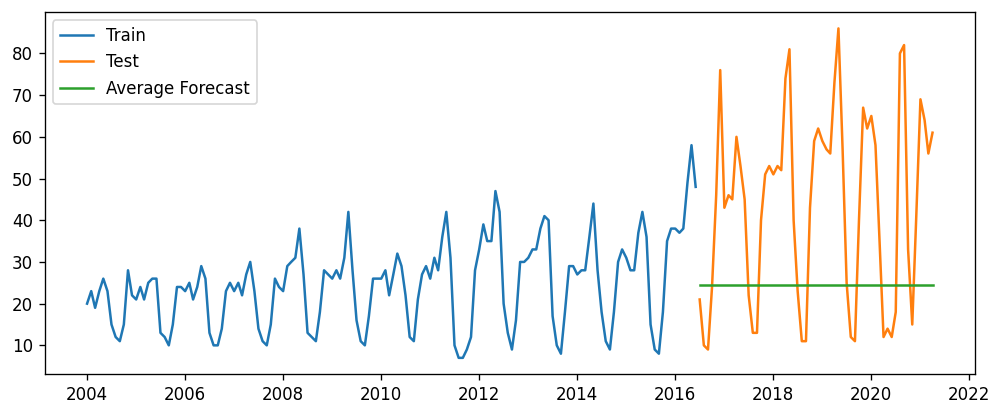

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['NBA'].mean()
plt.figure(figsize=(10,4))
plt.plot(train['NBA'], label='Train')
plt.plot(test['NBA'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_avg = sqrt(mean_squared_error(test.NBA, y_hat_avg.avg_forecast))
print(rms_avg)

29.657928223552805


### Trends of NBA league

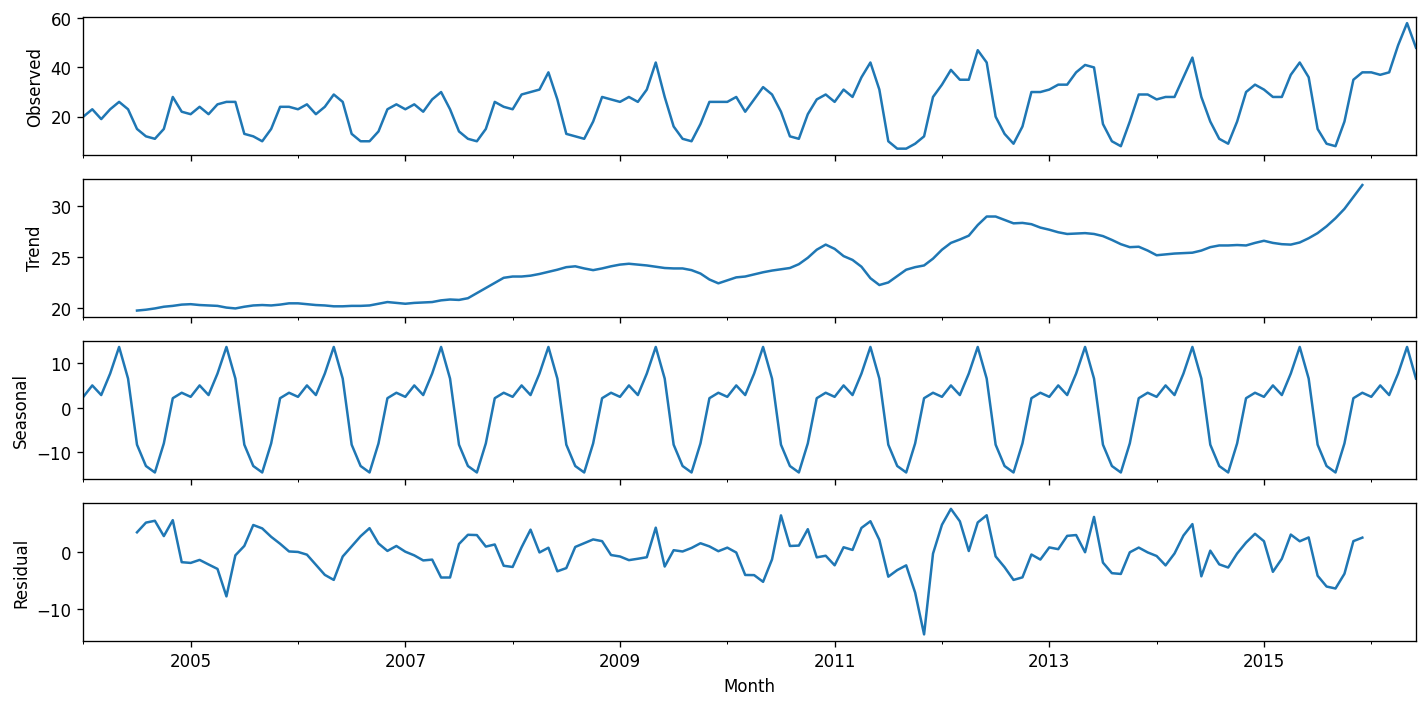

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.NBA).plot()
result = sm.tsa.stattools.adfuller(train.NBA)
plt.show()

### Holt's Linear Trend Model



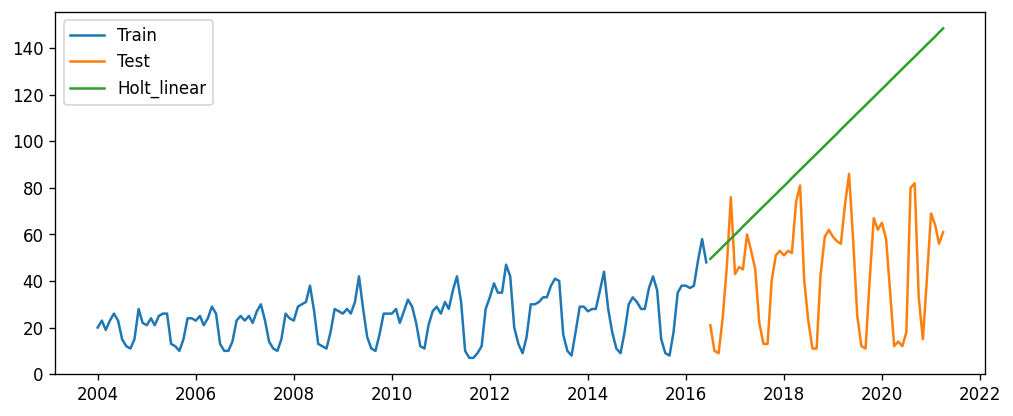

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['NBA'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(10,4))
plt.plot(train['NBA'], label='Train')
plt.plot(test['NBA'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()



In [ ]:
rms_lin = sqrt(mean_squared_error(test.NBA, y_hat_avg.Holt_linear))
print(rms_lin)

64.52006706190254


### Holt-Winters Exponential Model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


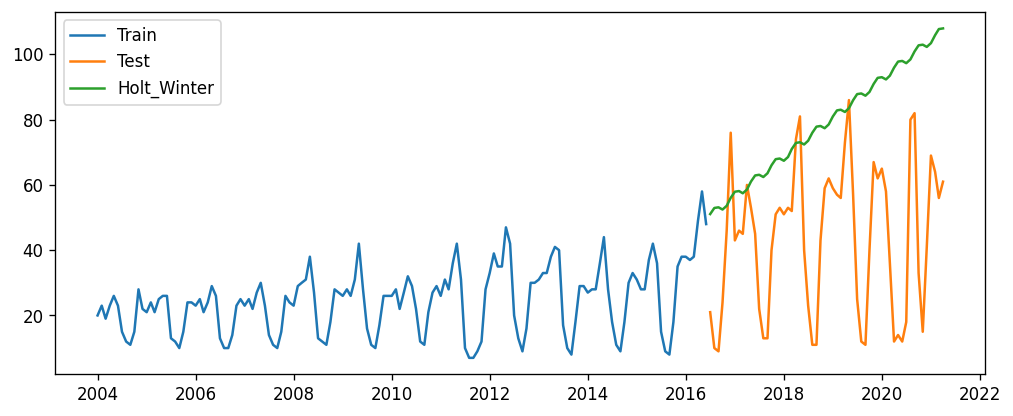

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['NBA']) ,seasonal_periods=5 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(10,4))
plt.plot( train['NBA'], label='Train')
plt.plot(test['NBA'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_exp = sqrt(mean_squared_error(test.NBA, y_hat_avg.Holt_Winter))
print(rms_exp)

43.5494170687715


### SARIMA MODEL

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


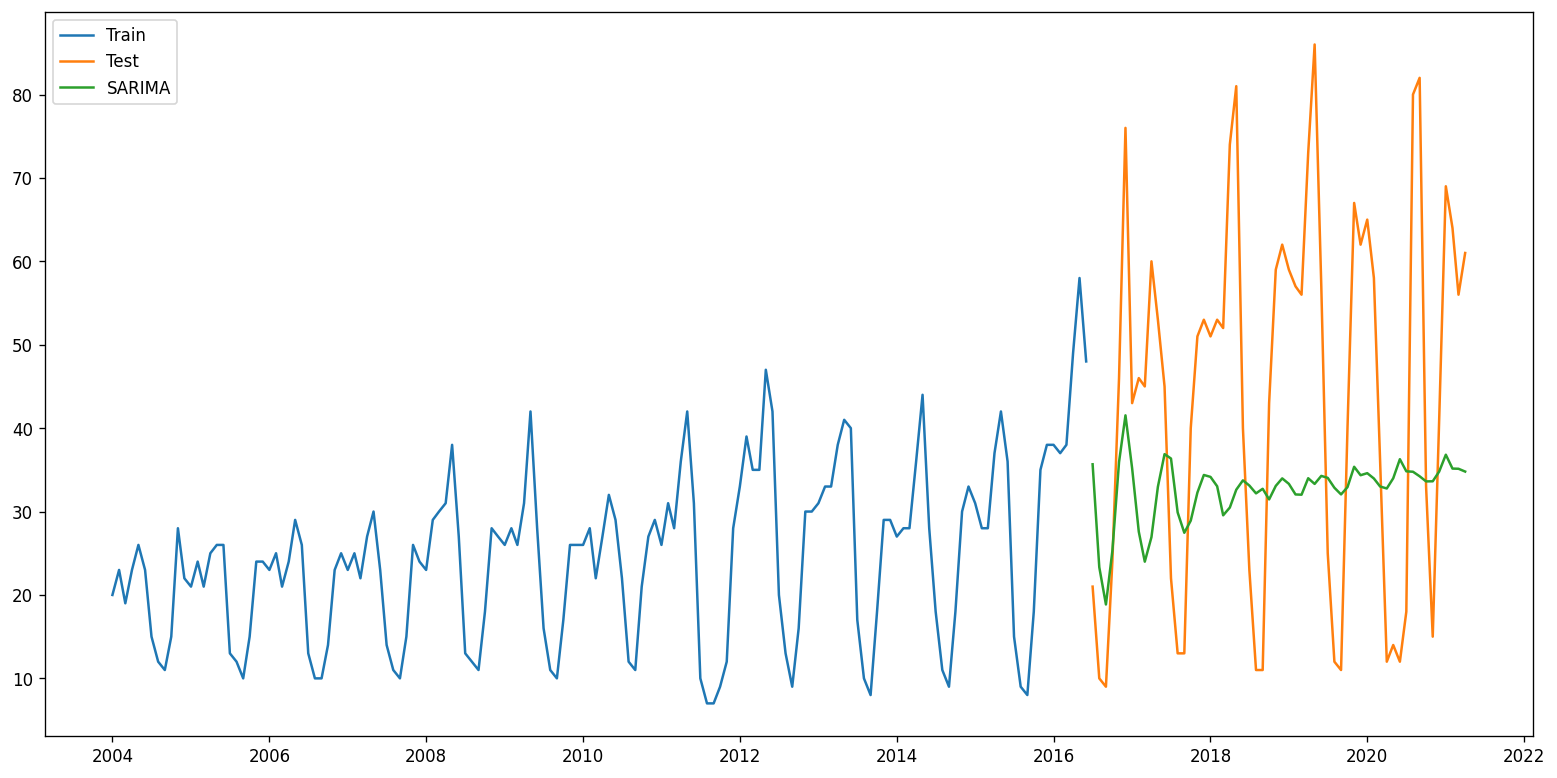

In [ ]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.NBA, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2016-06-1", end="2021-04-1", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['NBA'], label='Train')
plt.plot(test['NBA'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_sari = sqrt(mean_squared_error(test.NBA, y_hat_avg.SARIMA))
print(rms_sari)

24.261963430010194


Although SARIMA Model does not perform better than Naive method, it performs better than other models. It can be used to certain datasets where naive method or other models fail .

In [ ]:
from tabulate import tabulate 
from tabulate import tabulate_formats 
tbl=tabulate([["Naive Method ",rms_naive],["SimpleAvg",rms_avg],["Holts_linear",rms_lin],["Holts_Exponentiation",rms_exp],["SARIMA",rms_sari]],headers=["Method","RMSE"],tablefmt="rst")
print(tbl)

====================  =======
Method                   RMSE
====================  =======
Naive Method          22.7304
SimpleAvg             29.6579
Holts_linear          64.5201
Holts_Exponentiation  43.5494
SARIMA                24.262
====================  =======


###LA LIGA

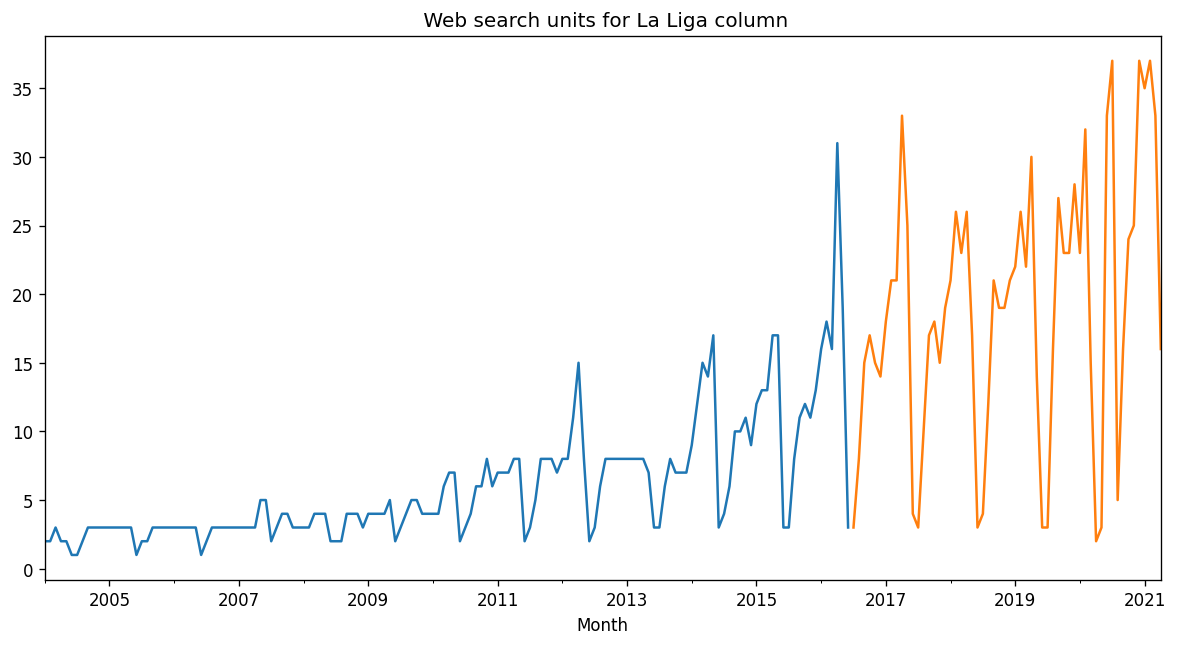

In [ ]:
train.LaLiga.plot(title=" Web Search units for La Liga column")
test.LaLiga.plot(title=" Web search units for La Liga column")
plt.show()

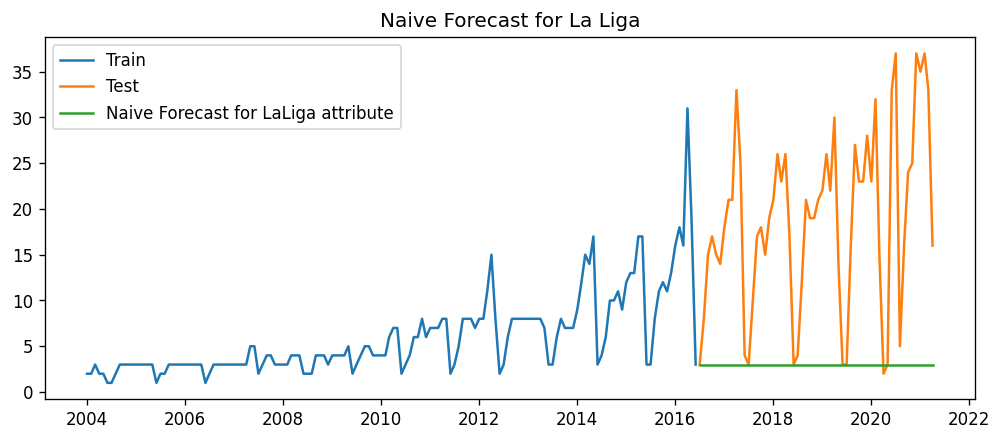

In [ ]:
# NAIVE FORECAST

dd =np.asarray(train.LaLiga)
y_hat = test.copy()
y_hat['naive']= dd[len(dd)-1]
plt.figure(figsize=(10,4))
plt.plot(train.index,train['LaLiga'],label='Train')
plt.plot(test.index,test['LaLiga'],label='Test')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast for LaLiga attribute')
plt.legend(loc='best')
plt.title("Naive Forecast for La Liga")
plt.show()

In [ ]:
## Printing RMSE for naive forecast 
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_naive = sqrt(mean_squared_error(test.LaLiga, y_hat.naive))
print(rms_naive)

18.65937870865757


###Simple Average

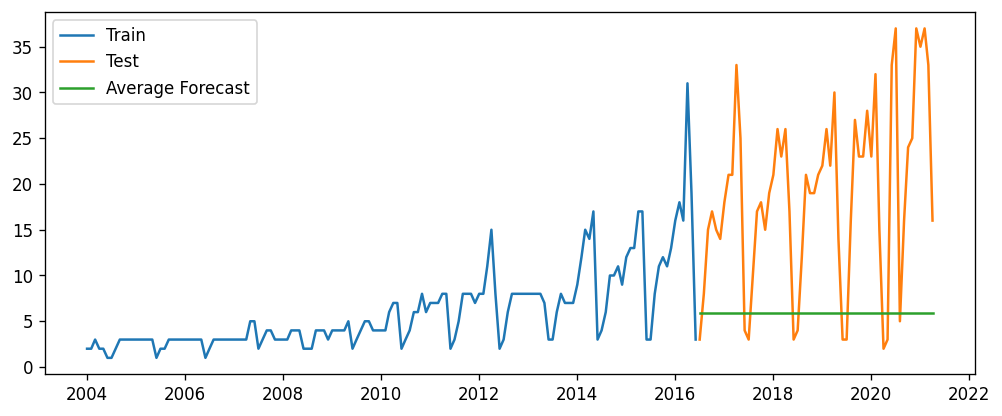

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['LaLiga'].mean()
plt.figure(figsize=(10,4))
plt.plot(train['LaLiga'], label='Train')
plt.plot(test['LaLiga'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_avg_laliga = sqrt(mean_squared_error(test.LaLiga, y_hat_avg.avg_forecast))
print(rms_avg_laliga)

16.22697720686236


###Trends of La Liga

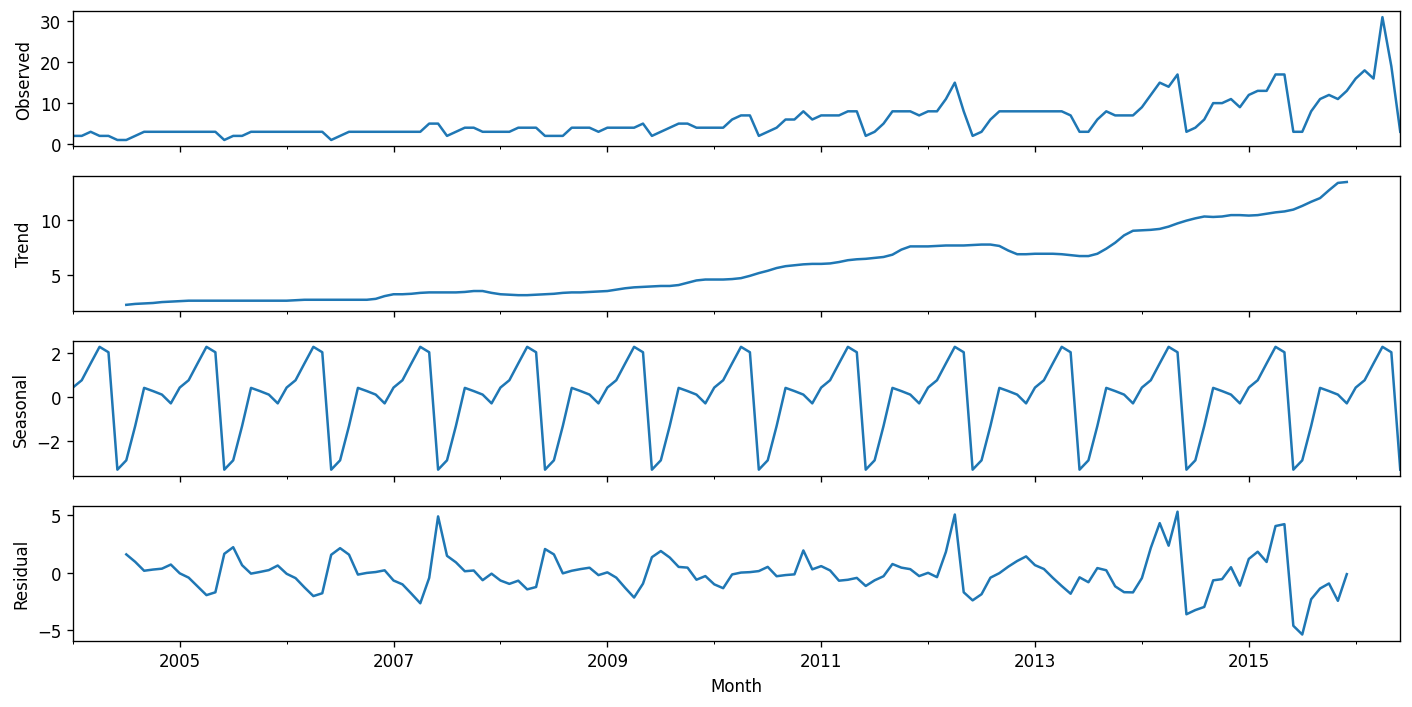

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.LaLiga).plot()
result = sm.tsa.stattools.adfuller(train.LaLiga)
plt.show()

###Holt's Linear Trend Model

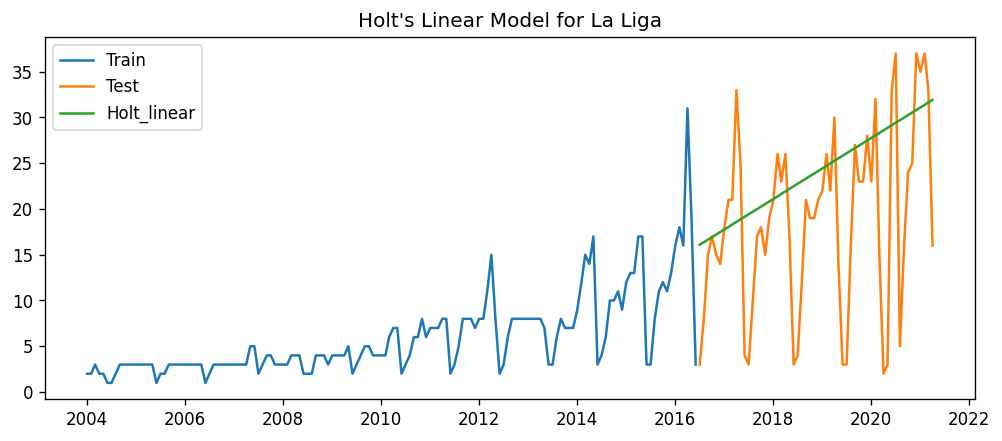

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['LaLiga'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(10,4))
plt.plot(train['LaLiga'], label='Train')
plt.plot(test['LaLiga'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.title("Holt's Linear Model for La Liga")
plt.show()

In [ ]:
rms_lin_laliga = sqrt(mean_squared_error(test.NBA, y_hat_avg.Holt_linear))
print(rms_lin_laliga)

29.79470551291588


###Holt's Winter Exponential Method

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


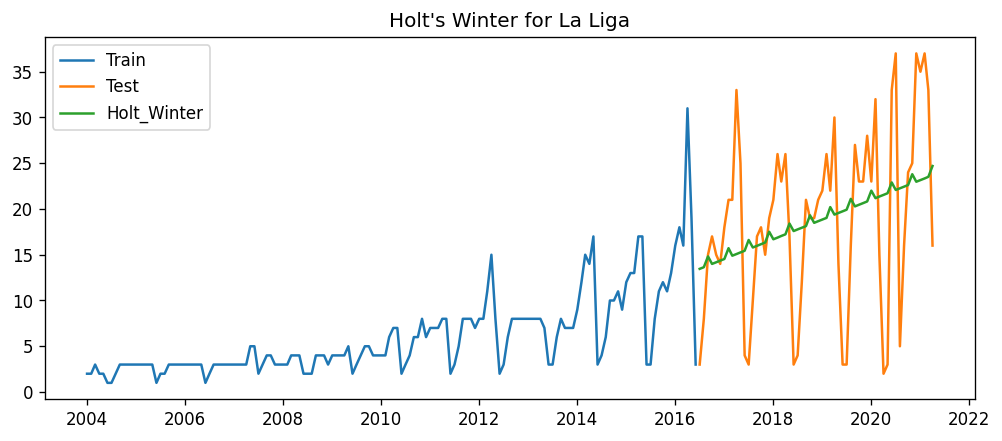

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['LaLiga']) ,seasonal_periods=5 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(10,4))
plt.plot( train['LaLiga'], label='Train')
plt.plot(test['LaLiga'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.title("Holt's Winter for La Liga")
plt.show()

In [ ]:
rms_exp_laliga = sqrt(mean_squared_error(test.LaLiga, y_hat_avg.Holt_Winter))
print(rms_exp_laliga)

9.120657413336923


###SARIMA MODEL


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


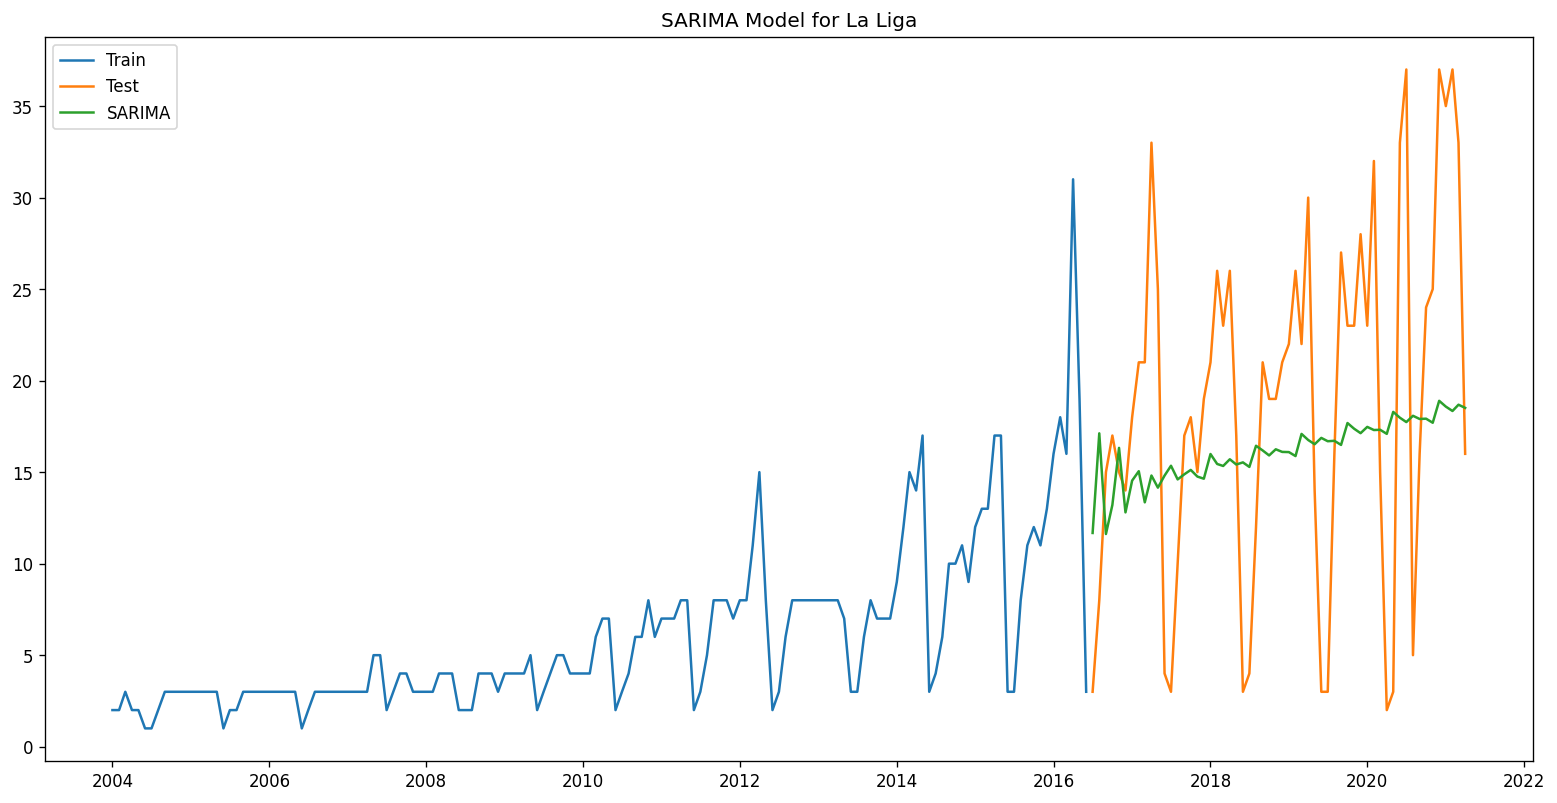

In [ ]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.LaLiga, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2016-06-1", end="2021-04-1", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['LaLiga'], label='Train')
plt.plot(test['LaLiga'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.title("SARIMA Model for La Liga")
plt.show()

In [ ]:
rms_sari_laliga = sqrt(mean_squared_error(test.LaLiga, y_hat_avg.SARIMA))
print(rms_sari_laliga)

9.720646644563708


In [ ]:
from tabulate import tabulate 
from tabulate import tabulate_formats 
tbl=tabulate([["Naive Method ",rms_naive],["SimpleAvg",rms_avg_laliga],["Holts_linear",rms_lin_laliga],
              ["Holts_Exponentiation",rms_exp_laliga],["SARIMA",rms_sari_laliga]],headers=["Method(La Liga)","RMSE"],tablefmt="rst")
print(tbl)

====================  ========
Method(La Liga)           RMSE
====================  ========
Naive Method          18.6594
SimpleAvg             16.227
Holts_linear          29.7947
Holts_Exponentiation   9.12066
SARIMA                 9.72065
====================  ========


###NFL

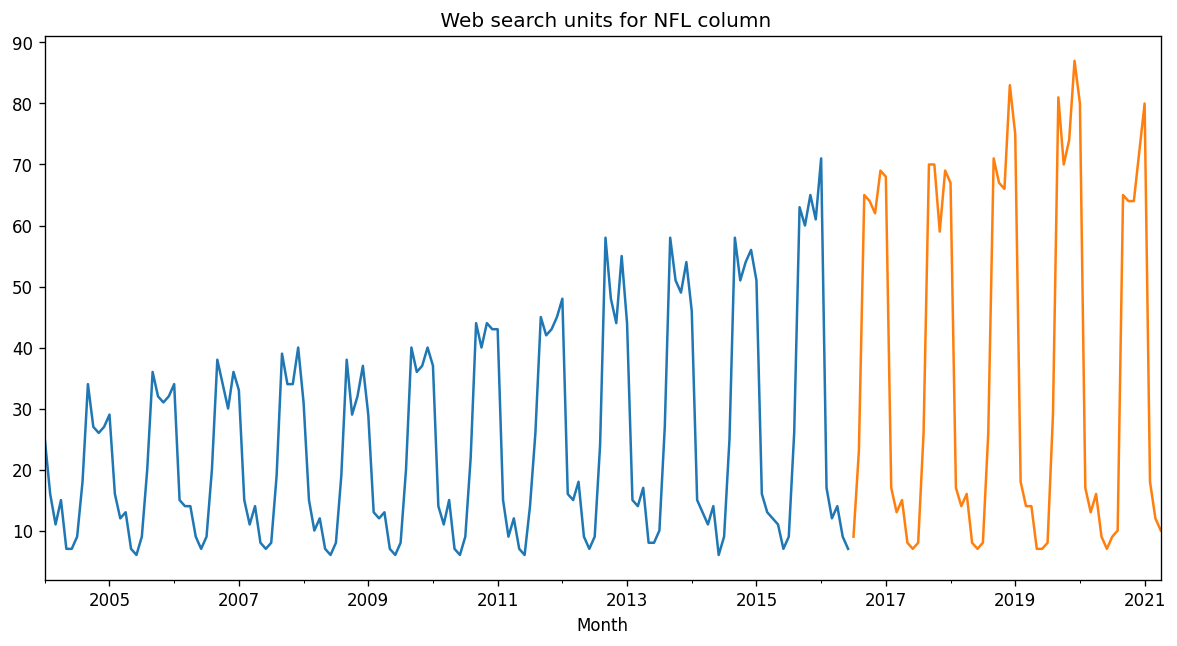

In [ ]:
train.NFL.plot(title=" Web Search units for NFL column")
test.NFL.plot(title=" Web search units for NFL column")
plt.show()

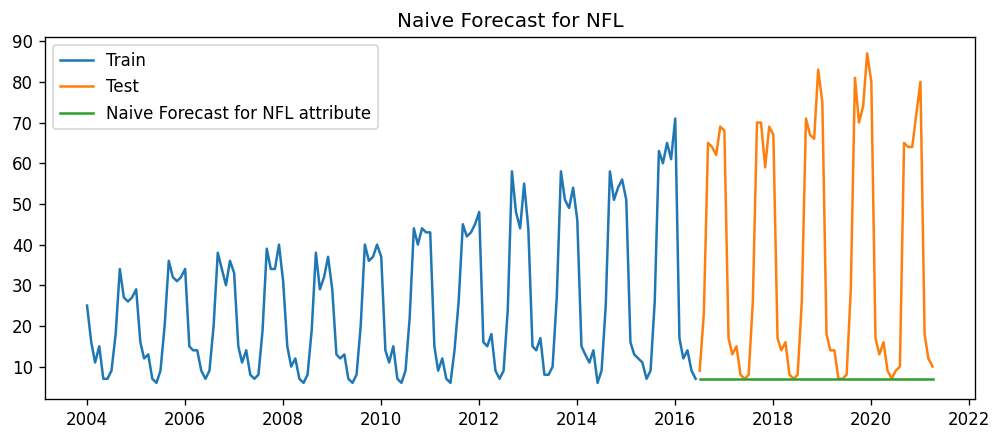

In [ ]:
# NAIVE FORECAST

dd =np.asarray(train.NFL)
y_hat = test.copy()
y_hat['naive']= dd[len(dd)-1]
plt.figure(figsize=(10,4))
plt.plot(train.index,train['NFL'],label='Train')
plt.plot(test.index,test['NFL'],label='Test')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast for NFL attribute')
plt.legend(loc='best')
plt.title("Naive Forecast for NFL")
plt.show()

In [ ]:
## Printing RMSE for naive forecast 
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_naive_nfl = sqrt(mean_squared_error(test.NFL, y_hat.naive))
print(rms_naive_nfl)

42.43737779932637


###Simple Average

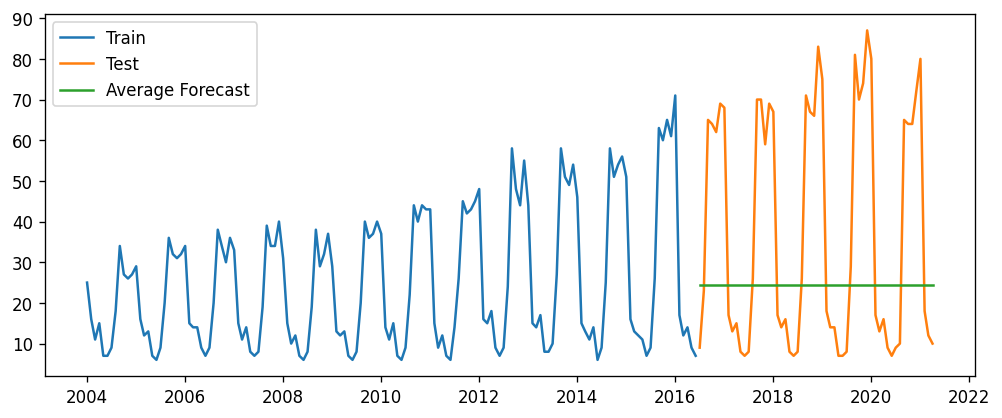

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['NFL'].mean()
plt.figure(figsize=(10,4))
plt.plot(train['NFL'], label='Train')
plt.plot(test['NFL'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_avg_nfl = sqrt(mean_squared_error(test.NFL, y_hat_avg.avg_forecast))
print(rms_avg_nfl)

31.979219521840324


###Trends of NFL

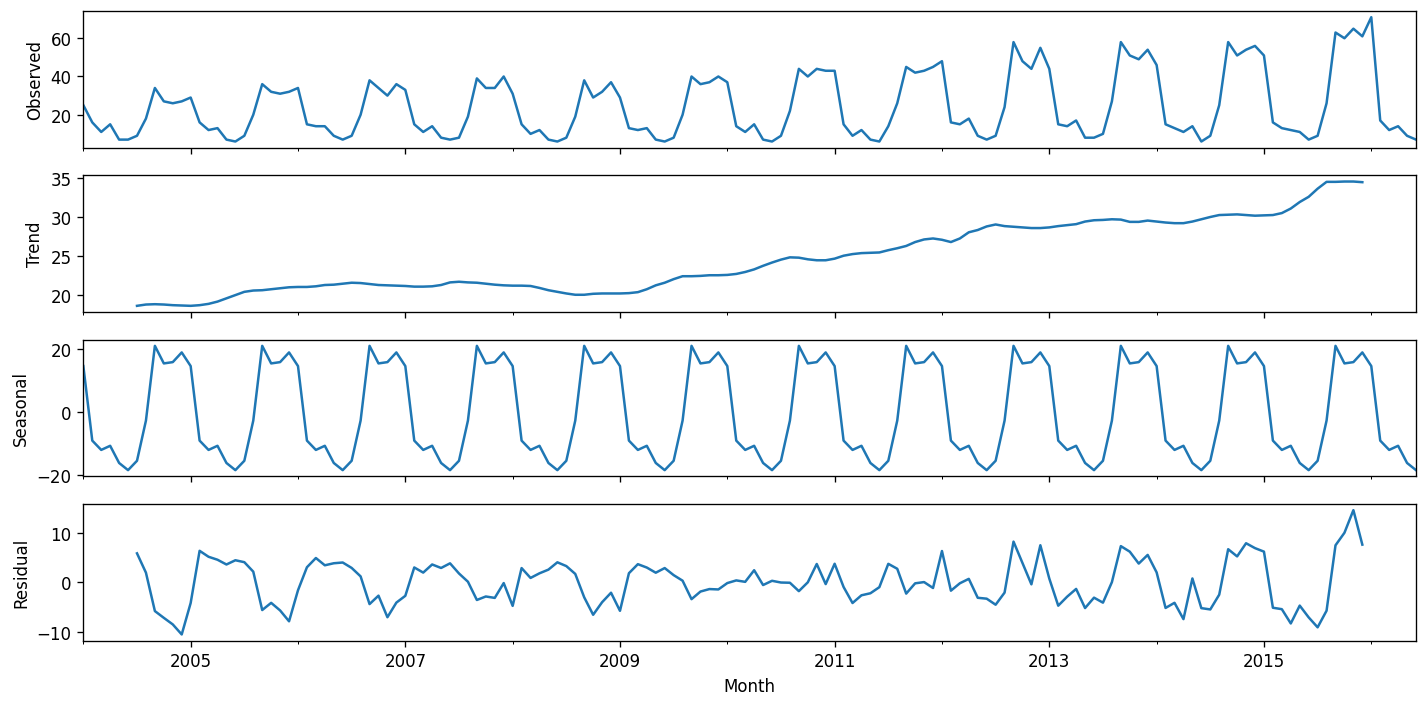

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.NFL).plot()
result = sm.tsa.stattools.adfuller(train.NFL)
plt.show()

###Holt's Linear Trend Model

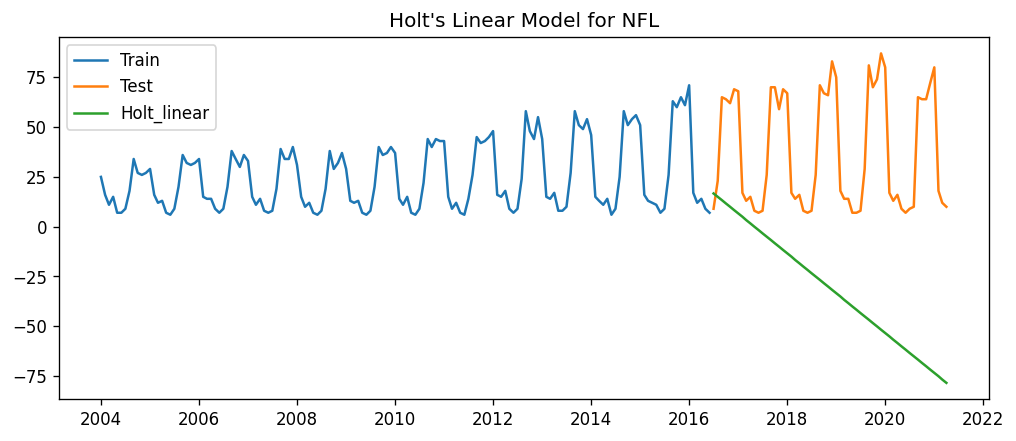

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['NFL'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(10,4))
plt.plot(train['NFL'], label='Train')
plt.plot(test['NFL'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.title("Holt's Linear Model for NFL")
plt.show()

In [ ]:
rms_lin_nfl = sqrt(mean_squared_error(test.NFL, y_hat_avg.Holt_linear))
print(rms_lin_nfl)

79.7735155494227


###Holt's Winter Exponential Method

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


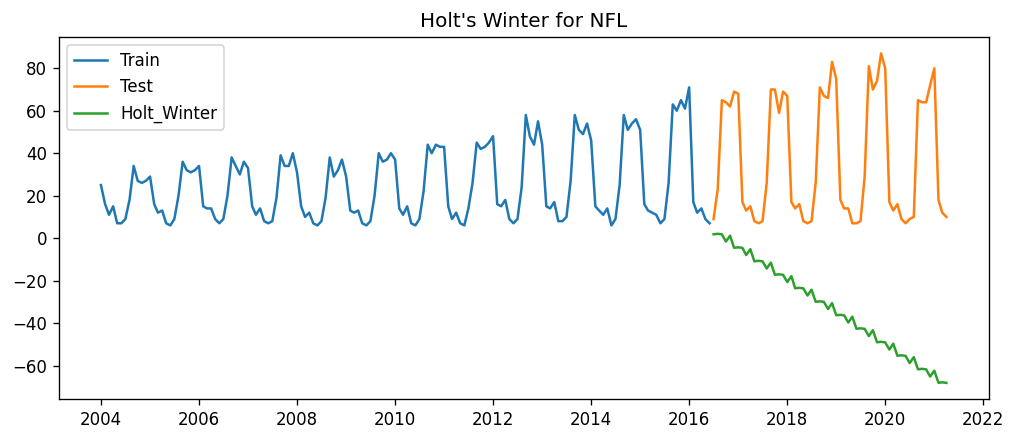

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['NFL']) ,seasonal_periods=5 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(10,4))
plt.plot( train['NFL'], label='Train')
plt.plot(test['NFL'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.title("Holt's Winter for NFL")
plt.show()

In [ ]:
rms_exp_nfl = sqrt(mean_squared_error(test.NFL, y_hat_avg.Holt_Winter))
print(rms_exp_nfl)

79.29739968352098


###SARIMA MODEL

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


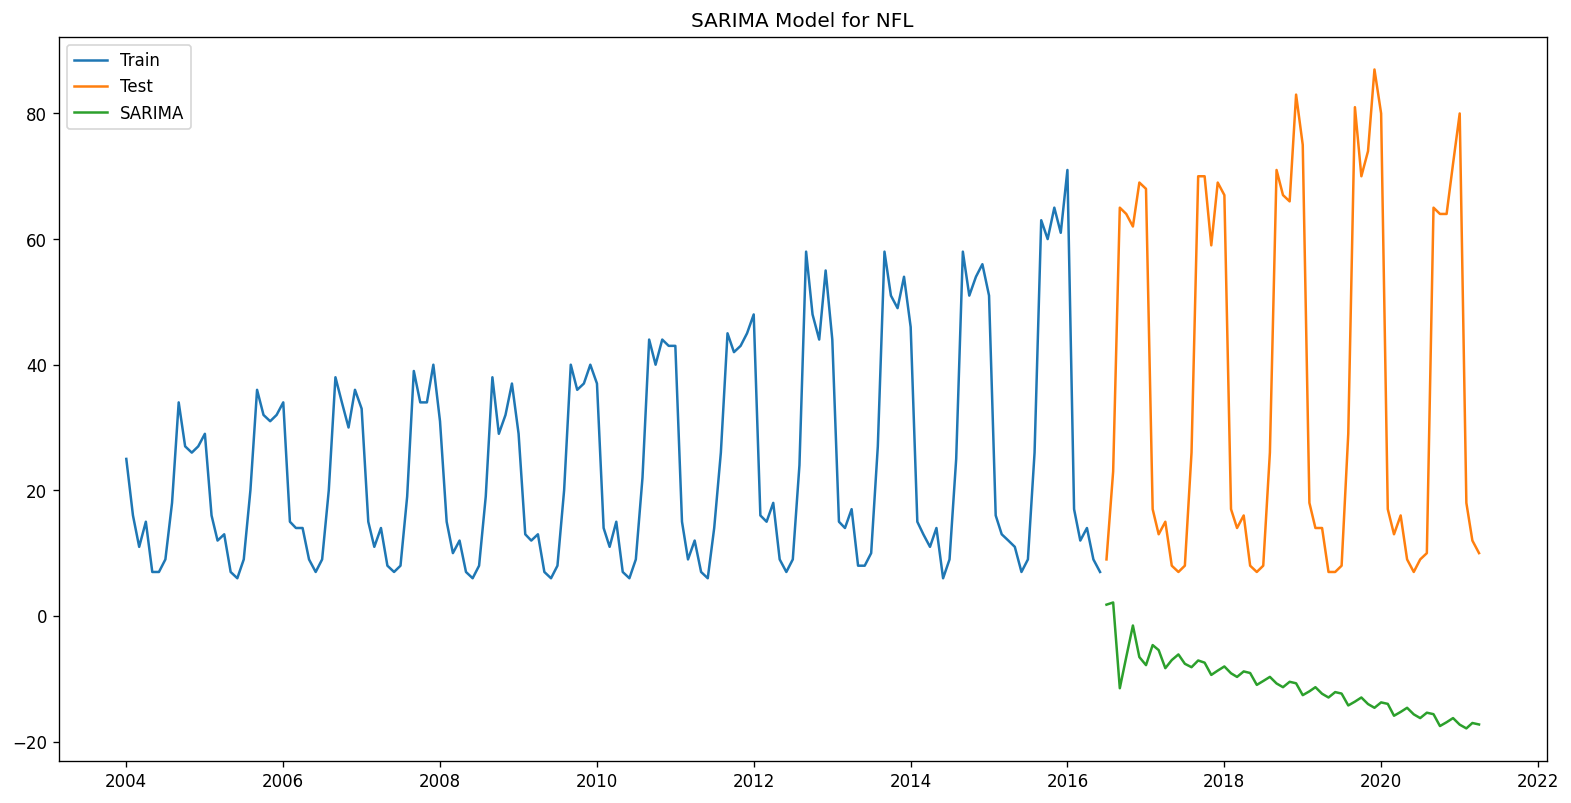

In [ ]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.NFL, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2016-06-1", end="2021-04-1", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['NFL'], label='Train')
plt.plot(test['NFL'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.title("SARIMA Model for NFL")
plt.show()

In [ ]:
rms_sari_nfl = sqrt(mean_squared_error(test.NFL, y_hat_avg.SARIMA))
print(rms_sari_nfl)

57.3008841584967


In [ ]:
from tabulate import tabulate 
from tabulate import tabulate_formats 
tbl=tabulate([["Naive Method ",rms_naive_nfl],["SimpleAvg",rms_avg_nfl],["Holts_linear",rms_lin_nfl],
              ["Holts_Exponentiation",rms_exp_nfl],["SARIMA",rms_sari_nfl]],headers=["Method(NFL)","RMSE"],tablefmt="rst")
print(tbl)

====================  =======
Method(NFL)              RMSE
====================  =======
Naive Method          42.4374
SimpleAvg             31.9792
Holts_linear          79.7735
Holts_Exponentiation  79.2974
SARIMA                57.3009
====================  =======


From different graphs , it can be infered that the popularity decreases after certain period.

[link text](https://)###PREMIER LEAGUE

# Premier League

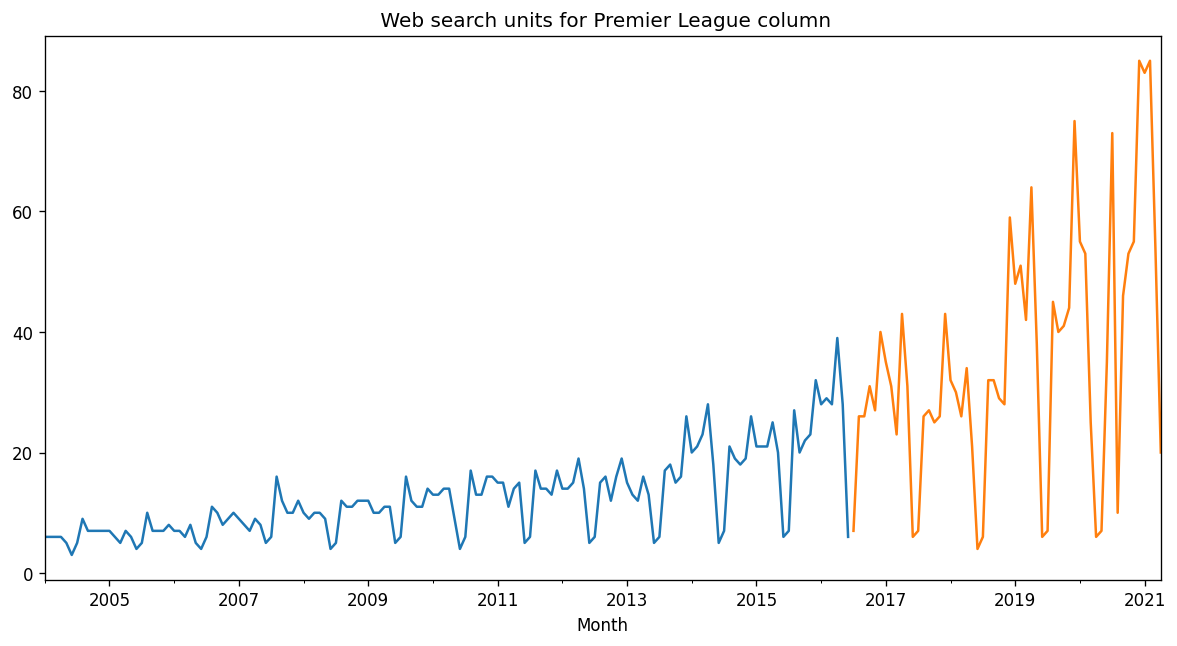

In [9]:
train['Premier League'].plot(title=" Web Search units for Premier League column")
test['Premier League'].plot(title=" Web search units for Premier League column")
plt.show()

### Naive Forecast

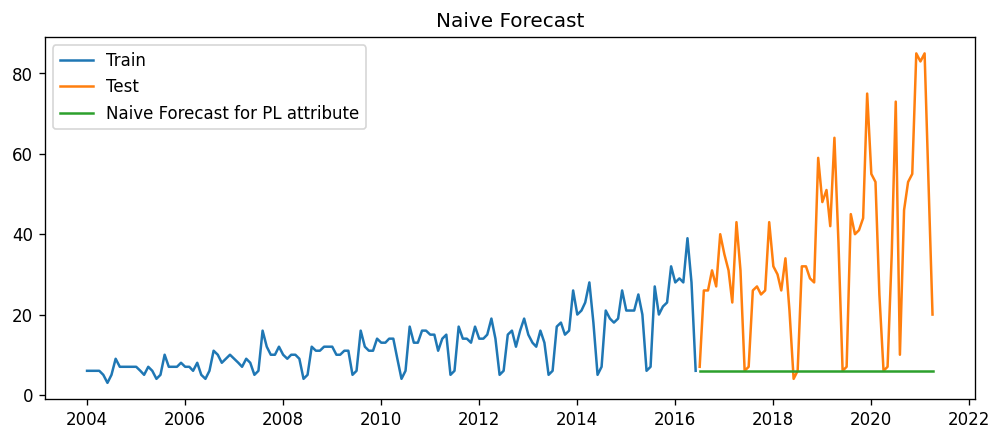

In [10]:
dd =np.asarray(train['Premier League'])
y_hat = test.copy()
y_hat['naive']= dd[len(dd)-1]
plt.figure(figsize=(10,4))
plt.plot(train.index,train['Premier League'],label='Train')
plt.plot(test.index,test['Premier League'],label='Test')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast for PL attribute')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

We can infer from the graph that the web search count for NBA league is not stable from say March,2016. Many a times we are provided with a dataset, which is stable throughout it’s time period. If we want to forecast the price for the next day, we can simply take the last day value and estimate the same value for the next day. Such forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method.The graph clearly shows that it's not stable for the upcoming days .Hence, the naive method should not be used. 



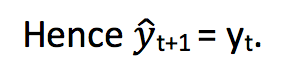

In [11]:
## Printing RMSE for naive forecast 
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_naive = sqrt(mean_squared_error(test['Premier League'], y_hat.naive))
print(rms_naive)

35.86444786539527


### Simple Average 
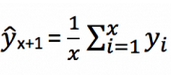

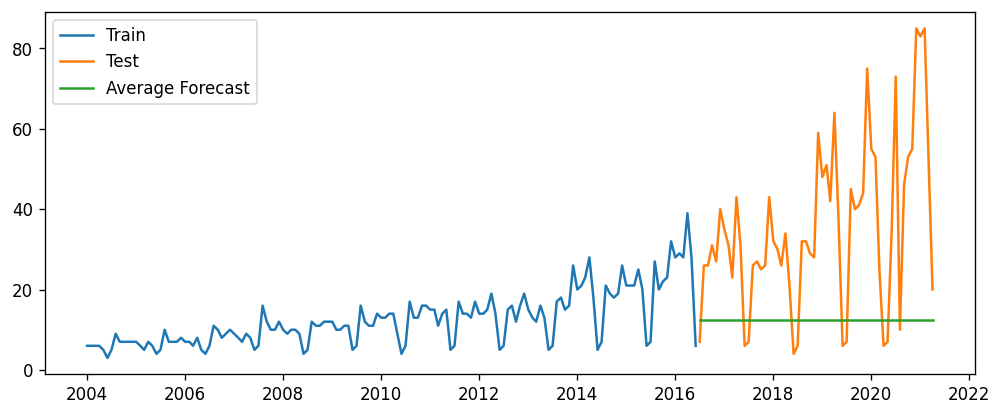

In [12]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Premier League'].mean()
plt.figure(figsize=(10,4))
plt.plot(train['Premier League'], label='Train')
plt.plot(test['Premier League'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [14]:
rms_avg = sqrt(mean_squared_error(test['Premier League'], y_hat_avg.avg_forecast))
print(rms_avg)

30.77093142382361


### Trends of NBA league

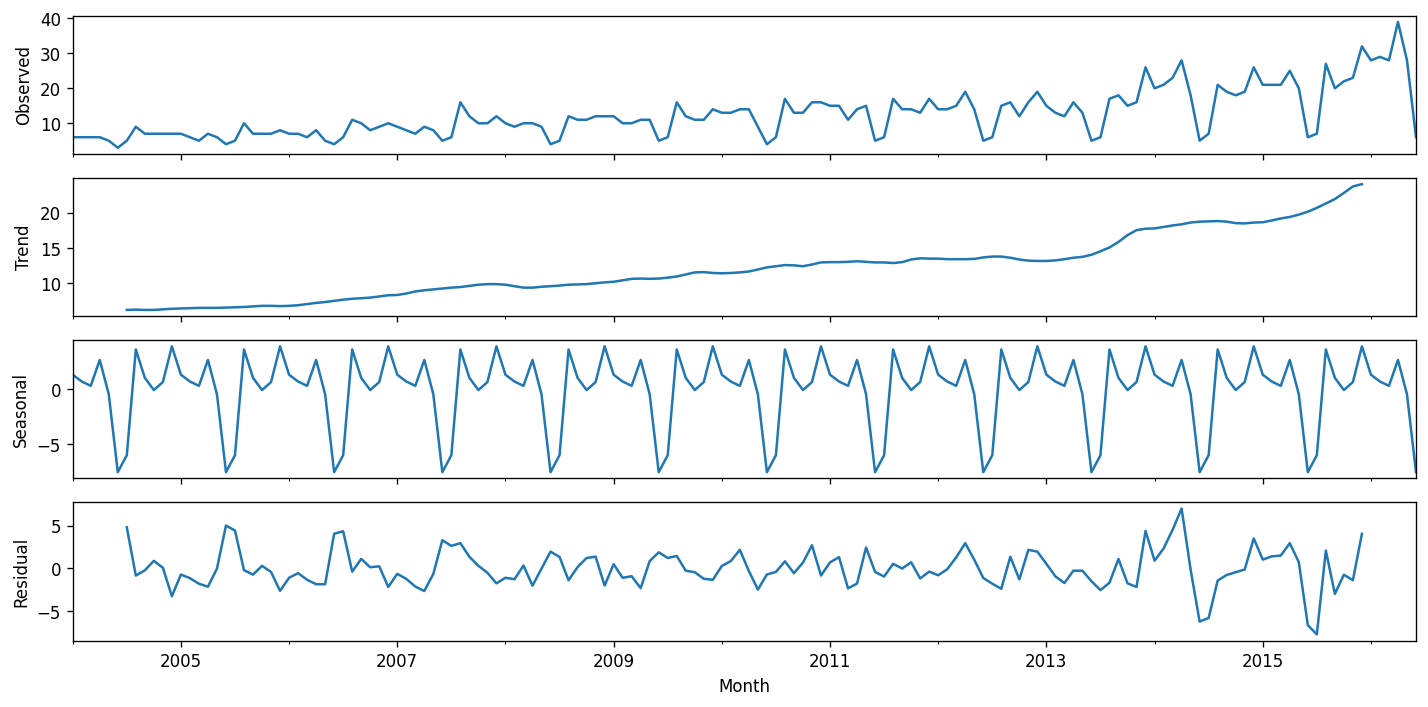

In [15]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train['Premier League']).plot()
result = sm.tsa.stattools.adfuller(train['Premier League'])
plt.show()

### Holt's Linear Trend Model



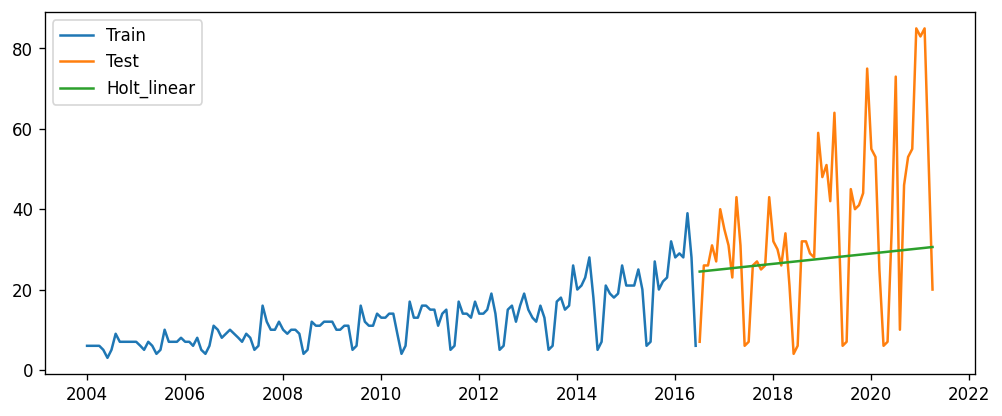

In [23]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Premier League'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(10,4))
plt.plot(train['Premier League'], label='Train')
plt.plot(test['Premier League'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()



In [24]:
rms_lin = sqrt(mean_squared_error(test['Premier League'], y_hat_avg.Holt_linear))
print(rms_lin)

21.205875371801273


### Holt-Winters Exponential Model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


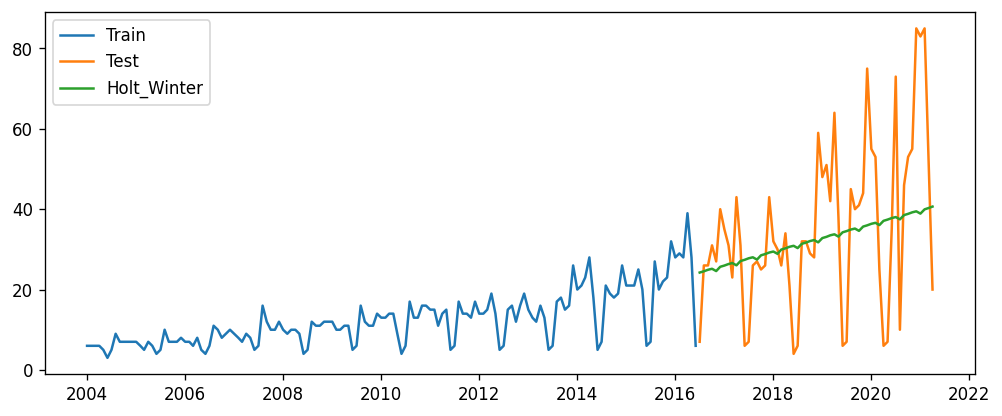

In [17]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Premier League']) ,seasonal_periods=5 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(10,4))
plt.plot( train['Premier League'], label='Train')
plt.plot(test['Premier League'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [18]:
rms_exp = sqrt(mean_squared_error(test['Premier League'], y_hat_avg.Holt_Winter))
print(rms_exp)

19.001094853724425


### SARIMA MODEL

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


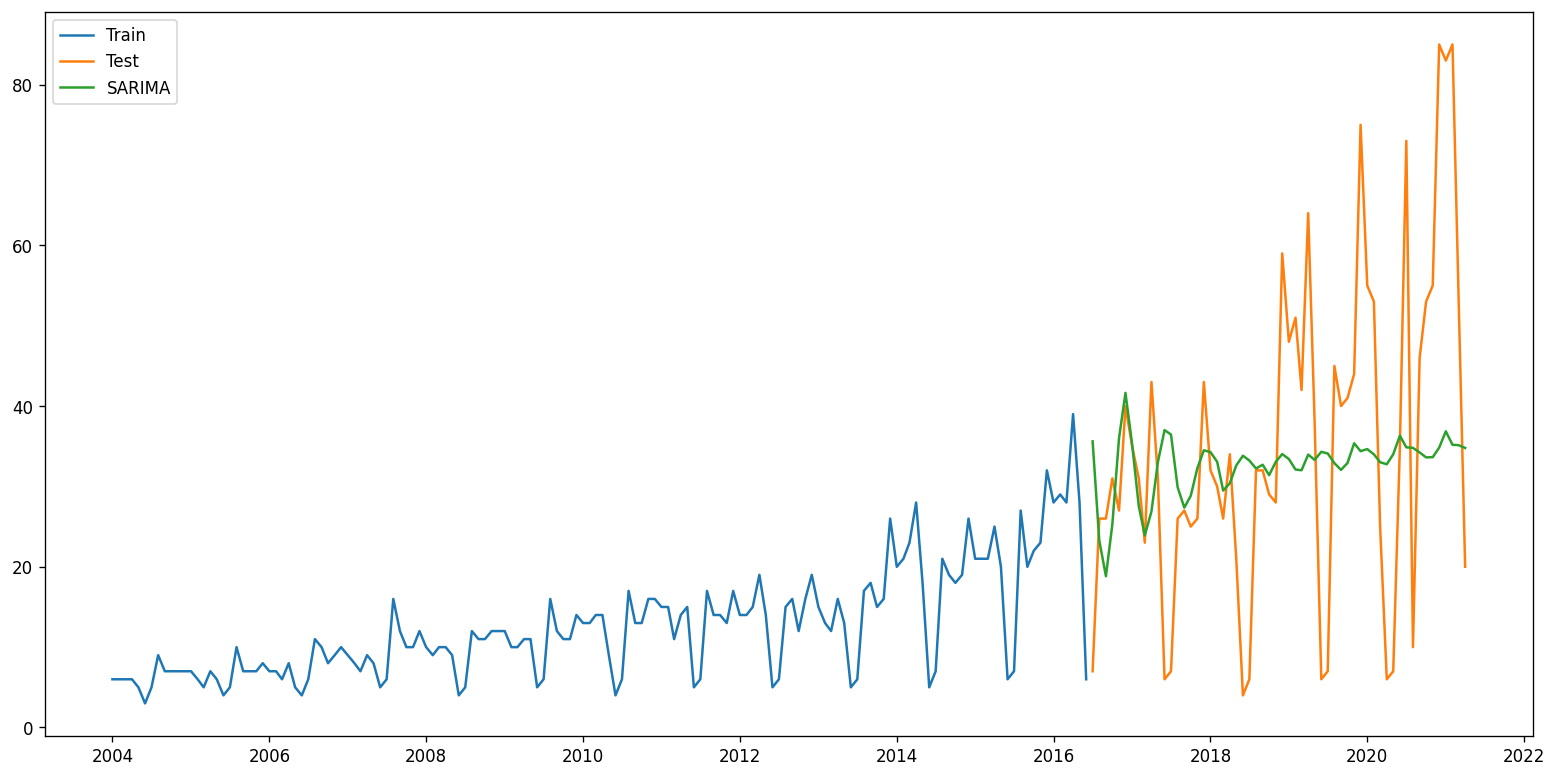

In [19]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.NBA, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2016-06-1", end="2021-04-1", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Premier League'], label='Train')
plt.plot(test['Premier League'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [20]:
rms_sari = sqrt(mean_squared_error(test['Premier League'], y_hat_avg.SARIMA))
print(rms_sari)

20.282206256768138


SARIMA , HWMM, Holt-linear model performed well for Premier League .

In [25]:
from tabulate import tabulate 
from tabulate import tabulate_formats 
tbl=tabulate([["Naive Method ",rms_naive],["SimpleAvg",rms_avg],["Holts_linear",rms_lin],["Holts_Exponentiation",rms_exp],["SARIMA",rms_sari]],headers=["Method","RMSE"],tablefmt="rst")
print(tbl)

====================  =======
Method                   RMSE
====================  =======
Naive Method          35.8644
SimpleAvg             30.7709
Holts_linear          21.2059
Holts_Exponentiation  19.0011
SARIMA                20.2822
====================  =======


## Done by-

1.   Samyak Kumar Sahoo-1828189
2.   Shikhar Saxena-1828195
3.   Shivam Chanda-1828197
4.   Shivam Singh- 1828200     

